In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\bajpa\Downloads\PAN+Card+Validation+in+PYTHON+-+Scripts\mymoviedb.csv", engine="python")
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.shape

(9837, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [5]:
# Convert Vote_Count to int64
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce').astype('Int64')

# Convert Vote_Average to float64
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   Int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: Int64(1), float64(2), object(6)
memory usage: 701.4+ KB


In [7]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9826.0,9826.000000
mean,40.320570,1392.943721,6.439467
std,108.874308,2611.303856,1.129797
min,7.100000,0.0,0.000000
25%,16.127500,146.0,5.900000
50%,21.191000,444.0,6.500000
75%,35.174500,1376.0,7.100000
max,5083.954000,31077.0,10.000000


In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Overview           9828 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9826 non-null   Int64         
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(2), object(5)
memory usage: 701.4+ KB


In [12]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('float64')

In [13]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021.0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022.0,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022.0,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021.0,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021.0,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [14]:
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis= 1,inplace =True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [15]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,6.3,Thriller
3,2021.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [16]:
def categorize_col(df, col, labels):
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    
    df[col] = pd.cut(
        df[col],
        bins=edges,
        labels=labels,
        duplicates='drop'
    )
    
    return df


In [17]:
labels = ['not_popular', 'below_avg','average','popular']

categorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [18]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,below_avg,Thriller
3,2021.0,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [19]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [20]:
df.dropna(inplace = True)


In [21]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [22]:
df['Genre'] = df['Genre'].str.split(', ')

df= df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151,popular,Crime
4,2022.0,The Batman,3827.658,1151,popular,Mystery


In [23]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  float64 
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  Int64   
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: Int64(1), category(2), float64(2), object(1)
memory usage: 874.3+ KB


In [25]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [26]:
sns.set_style('whitegrid')

In [27]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

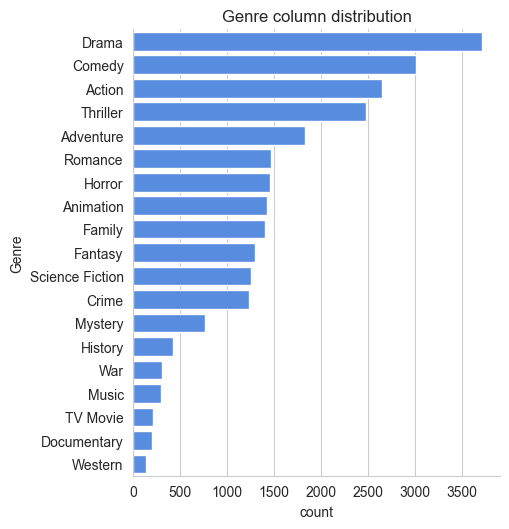

In [29]:
sns.catplot(y = 'Genre', data = df,kind = 'count',
           order = df['Genre'].value_counts().index,
           color = '#4287f5')
plt.title('Genre column distribution')
plt.show()

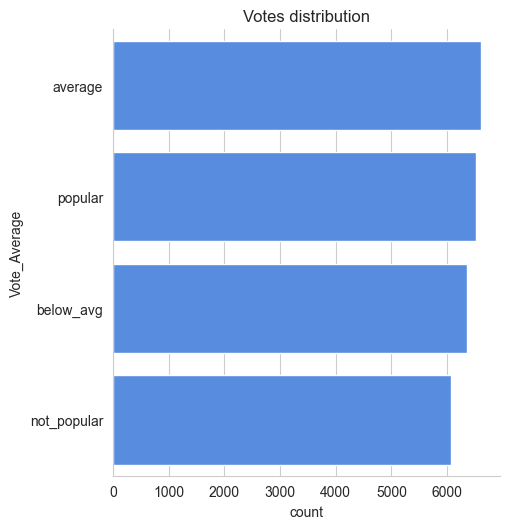

In [33]:
sns.catplot(y = 'Vote_Average', data = df,kind = 'count',
           order = df['Vote_Average'].value_counts().index,
           color = '#4287f5')
plt.title('Votes distribution')
plt.show()

In [36]:
df[df['Popularity'] == df['Popularity'].max()] 

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [37]:
df[df['Popularity'] == df['Popularity'].min()] 

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021.0,The United States vs. Billie Holiday,13.354,152,average,Music
25546,2021.0,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,2021.0,The United States vs. Billie Holiday,13.354,152,average,History
25548,1984.0,Threads,13.354,186,popular,War
25549,1984.0,Threads,13.354,186,popular,Drama
25550,1984.0,Threads,13.354,186,popular,Science Fiction


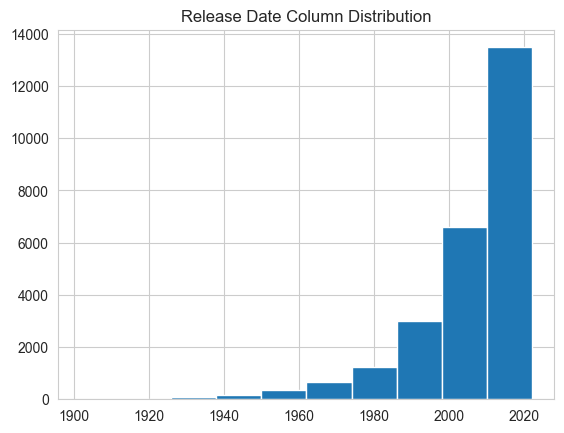

In [39]:
df['Release_Date'].hist()
plt.title("Release Date Column Distribution")
plt.show()